In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamond-price-prediction/diamonds.csv


In [2]:
df1=pd.read_csv('/kaggle/input/diamond-price-prediction/diamonds.csv')

In [3]:
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df1.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='cut', ylabel='count'>

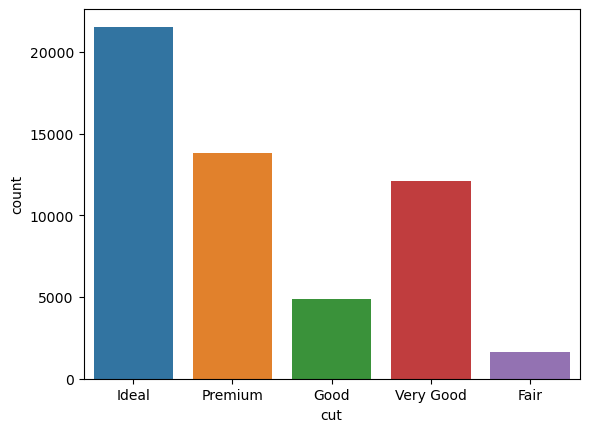

In [11]:
sns.countplot(data=df1,x='cut')

# People prefer  more ideal cut than other types of cut

In [29]:
df1[df1['carat']<10].value_counts()

carat  cut      color  clarity  depth  table  price  x      y      z   
0.79   Ideal    G      SI1      62.3   57.0   2898   5.90   5.85   3.66    5
0.50   Premium  D      SI2      62.9   58.0   997    5.06   5.01   3.17    2
1.20   Premium  I      VS2      62.6   58.0   5699   6.77   6.72   4.22    2
0.52   Ideal    D      VS2      61.8   55.0   1822   5.16   5.19   3.20    2
0.41   Ideal    G      IF       61.7   56.0   1367   4.77   4.80   2.95    2
                                                                          ..
0.50   Ideal    E      VS1      61.9   56.0   1716   5.09   5.12   3.16    1
                                62.0   58.0   1755   5.09   5.14   3.17    1
                                62.2   54.0   1665   5.10   5.13   3.18    1
                                       56.0   1619   5.10   5.13   3.18    1
5.01   Fair     J      I1       65.5   59.0   18018  10.74  10.54  6.98    1
Length: 53794, dtype: int64

In [31]:
t=df1['carat'].value_counts()

In [19]:
df1.shape

(53940, 10)

In [36]:
df1['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

<Axes: xlabel='color', ylabel='count'>

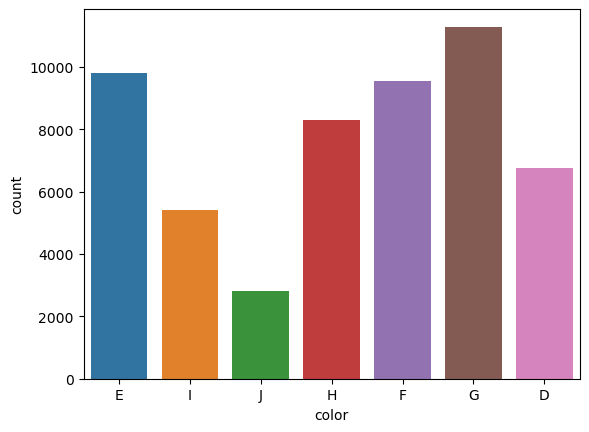

In [37]:
sns.countplot(data=df1,x='color')

# G type color is the most preferred color

In [38]:
df1['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

<Axes: xlabel='clarity', ylabel='count'>

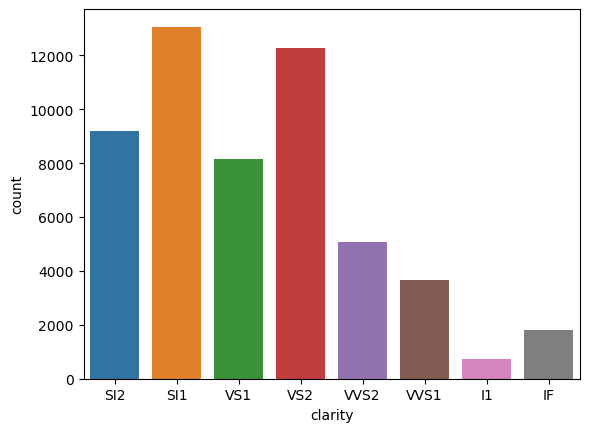

In [39]:
sns.countplot(data=df1,x='clarity')

In [40]:
df1.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [43]:
df1.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

/tmp/ipykernel_32/1885410006.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co=df1.corr()


<Axes: >

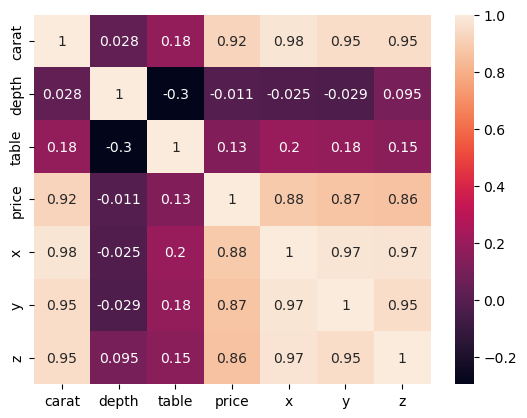

In [41]:
co=df1.corr()
sns.heatmap(co,annot=True)

# We can observe that there is a positive correlation between price,x,y,z

In [45]:
df1.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [63]:
df2=df1.groupby(['cut']).count()

In [64]:
df2

,carat,color,clarity,depth,table,price,x,y,z
cut,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082


In [66]:
new=df1[['x','y','z']]

# Calculating the variable inflation factor to decide which feature to eliminate among the highly correlated variable

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['variable']=new.columns
vif['v']=[variance_inflation_factor(new.values,i) for i in range(new.shape[1])]
vif

,variable,v
0,x,880.191185
1,y,530.336396
2,z,458.516788


#  Columns x and y have high vif values so hence have to be eliminated

In [68]:
df1=df1.drop(columns=['x','y'])

In [70]:
df1.head()

,carat,cut,color,clarity,depth,table,price,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,2.75


In [71]:
df1.shape

(53940, 8)

# No missing values

In [74]:
df1.isna().sum().sum()

0

In [75]:
cat_cols=['carat','cut','color','clarity']
numerical_cols=['depth','table','z']

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [98]:
cl=ColumnTransformer([('sc',StandardScaler(),numerical_cols),
                     ('ohe',OneHotEncoder(),cat_cols)
                     ])
kp=cl.fit_transform(df1).toarray()
df3=pd.DataFrame(kp)
# df3.head()
# the first row is in df3 is (0, 0)\t-0.1740915083097858\n (0, 1)\t-1.09..

In [104]:
len(df3.columns)

296

In [105]:
df3.columns=numerical_cols+[i for i in range(0,293)]

In [116]:
df3.columns=df3.columns.astype('str')

In [117]:
X=df3
y=df1['price']

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [119]:
from sklearn.svm import SVR

In [120]:
svr=SVR()

In [121]:
svr.fit(X_train,y_train)

SVR()

In [123]:
y_pred=svr.predict(X_test)

In [132]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)

In [133]:
mse

10007287.993315455

In [135]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [136]:
lr.fit(X_train,y_train)

LinearRegression()

In [137]:
y_pred=lr.predict(X_test)

In [138]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)

In [139]:
mse

4.931564709151678e+22

# LinearRegression is far more better than Support Vector Regressor as the mean squarred error is  very low in Linear Regression